In [154]:
%matplotlib inline
%run ./formating.py
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
print(f"sklearn version : {sklearn.__version__}")

# just adding a comment
Project = 'spaceship-titanic'

#/kaggle/working
initial_directory = os.getcwd()
online = True if initial_directory=='/kaggle/working' else False
#/kaggle
parrent_directory = os.path.split(initial_directory)[0]
#whether we are working online or locally,os.path.join allows us to deal easily with 

train_file = os.path.join(parrent_directory,'input',Project,"train.csv")
test_file = os.path.join(parrent_directory,'input',Project,"test.csv")
print(train_file,"\n",test_file)

sklearn version : 1.0.2
C:\Users\qarna\Desktop\kaggle\input\spaceship-titanic\train.csv 
 C:\Users\qarna\Desktop\kaggle\input\spaceship-titanic\test.csv


In [155]:
data = pd.read_csv(train_file)
test = pd.read_csv(test_file)
#full_data = pd.concat([data.drop(columns=['Transported']),test])

In [159]:
data=format_data(data)

In [160]:
data.info()
initial_features = data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   GroupId             8693 non-null   object 
 2   GroupSubId          8693 non-null   object 
 3   Name                8493 non-null   object 
 4   FirstName           8493 non-null   object 
 5   FamilyName          8493 non-null   object 
 6   FamilyId            8693 non-null   object 
 7   Age                 8514 non-null   float64
 8   GroupNb             8693 non-null   float64
 9   FamilyNb            8693 non-null   float64
 10  Cabin               8494 non-null   object 
 11  CabinDeck           8494 non-null   object 
 12  CabinNum            8494 non-null   float64
 13  CabinSide           8494 non-null   object 
 14  HomePlanet          8492 non-null   object 
 15  Destination         8511 non-null   object 
 16  CryoSl

In [161]:
data.describe()

,Age,GroupNb,FamilyNb,CabinNum,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,MoneySpent,FamilyRoomService,FamilyFoodCourt,FamilyShoppingMall,FamilySpa,FamilyVRDeck,FamilyMoneySpent
count,8514.000000,8693.000000,8693.000000,8494.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,2.035546,1.775336,600.367671,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329,361.876222,839.854596,265.743242,568.919475,547.761877,2584.155412
std,14.489021,1.596347,1.269407,511.867226,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694,932.951317,2462.031910,758.204044,1722.910084,1657.617125,4712.409991
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,1.000000,167.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,1.000000,427.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000,0.000000,0.000000,0.000000,0.000000,0.000000,899.000000
75%,38.000000,3.000000,2.000000,999.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000,256.000000,444.000000,147.000000,293.000000,287.000000,2524.000000
max,79.000000,8.000000,8.000000,1894.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,45970.000000


People in CabinDeck G all come from Earth
People in CabinDeck A, B and C all come from Europa
This should help filling missing values for HomePlanet variable

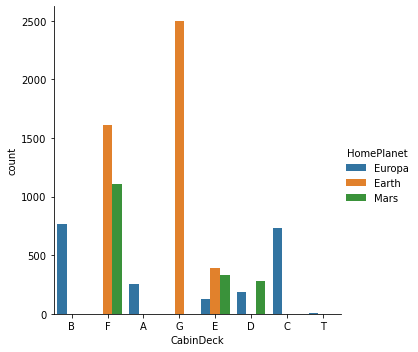

In [162]:
sns.catplot(data = data , x='CabinDeck',hue='HomePlanet',kind='count')

In [163]:
data[data.HomePlanet.isnull()].groupby("CabinDeck").PassengerId.count()

CabinDeck
A     4
B    13
C    13
D    10
E    23
F    70
G    61
T     1
Name: PassengerId, dtype: int64

In [164]:
data[data.Age.isnull()][['CryoSleep','VIP']].value_counts()

CryoSleep  VIP  
False      False    91
True       False    80
False      True      1
dtype: int64

VIPs never come from Earth
This should help filling missing values for VIP variable
VIPs from Europa are all adults

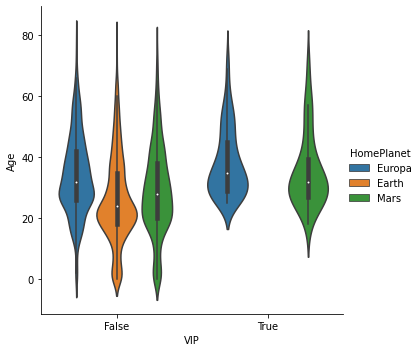

In [165]:
sns.catplot(data = data , x='VIP', y='Age',hue='HomePlanet',kind='violin')

In [166]:
data[data.HomePlanet.isnull()][["CabinDeck","VIP","CryoSleep"]].value_counts()

CabinDeck  VIP    CryoSleep
F          False  False        48
G          False  False        32
                  True         28
E          False  False        17
F          False  True         17
B          False  True          8
C          False  True          7
E          False  True          6
B          False  False         5
C          False  False         5
D          False  False         5
F          True   False         3
A          False  False         2
D          False  True          2
A          False  True          2
D          True   True          1
                  False         1
T          False  False         1
dtype: int64

288

In [170]:
threshold = 10
var_null = 'VIP'
var_help = ["CabinDeck","HomePlanet","CryoSleep","Destination"] 

total_null = data[var_null].isnull().sum()
test = pd.DataFrame(data[data[var_null].isnull()][var_help].value_counts()).reset_index()
test.columns = var_help + ["counts"]

total_help = 0
Details = True
for i in range(test.shape[0]):
    mask = np.ones_like(data.shape[0])
    c = test.iloc[i]["counts"]
    #print(i,mask)
    for col in var_help:
        mask = mask & (data[col] == test.iloc[i][col])
    a = data[mask][var_null].value_counts()
    n_instances_similar_features = a[0]
    sole_value = a.index[0]
    if(len(a)==1 and n_instances_similar_features>=threshold):
        total_help += c
        if(Details):
            print("\n")
            print(f"{c} missing values in {var_null} should be filled with {sole_value}")
            print(f"because in the data, all the {n_instances_similar_features} instances with similar features for {var_help} have {var_null}={sole_value}")
        
print(f"out of the {total_null} {var_null} missing values, {total_help} could be filled confidently ({total_help/total_null*100:.2f}% ) with a threshold set at {threshold}")



23 missing values in VIP should be filled with False
because in the data, all the 1038 instances with similar features for ['CabinDeck', 'HomePlanet', 'CryoSleep', 'Destination'] have VIP=False


22 missing values in VIP should be filled with False
because in the data, all the 749 instances with similar features for ['CabinDeck', 'HomePlanet', 'CryoSleep', 'Destination'] have VIP=False


19 missing values in VIP should be filled with False
because in the data, all the 808 instances with similar features for ['CabinDeck', 'HomePlanet', 'CryoSleep', 'Destination'] have VIP=False


14 missing values in VIP should be filled with False
because in the data, all the 428 instances with similar features for ['CabinDeck', 'HomePlanet', 'CryoSleep', 'Destination'] have VIP=False


9 missing values in VIP should be filled with False
because in the data, all the 253 instances with similar features for ['CabinDeck', 'HomePlanet', 'CryoSleep', 'Destination'] have VIP=False


7 missing values in VIP

In [117]:
test

,CabinDeck,VIP,CryoSleep,counts
0,F,False,False,71
1,G,False,False,41
2,G,False,True,39
3,E,False,False,24
4,F,False,True,22
5,C,False,True,12
6,D,False,False,11
7,B,False,False,9
8,E,False,True,9
9,B,False,True,8


In [54]:
data[["HomePlanet","CabinDeck","VIP","CryoSleep"]].value_counts()

HomePlanet  CabinDeck  VIP    CryoSleep
Earth       F          False  False        2294
            G          False  True         1935
                              False        1594
Mars        F          False  False         809
                              True          791
Europa      B          False  True          573
Earth       E          False  False         547
Europa      C          False  False         542
            B          False  False         442
            C          False  True          429
Mars        E          False  False         315
            D          False  False         315
Europa      A          False  False         194
            D          False  False         163
Mars        E          False  True          150
Europa      D          False  True          113
            E          False  False         111
            A          False  True           88
            E          False  True           72
            B          True   False          47


In [ ]:
sns.catplot(data = data , x='CabinDeck',hue='CryoSleep',kind='count')

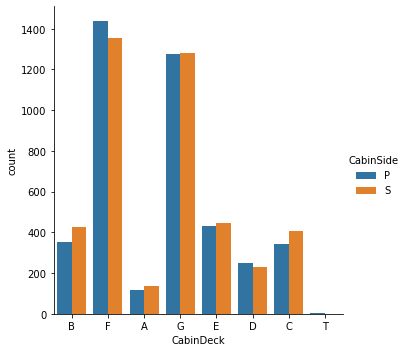

In [102]:
sns.catplot(data = data , x='CabinDeck',hue='CabinSide',kind='count')

In [95]:
data[(data.FamilyNb>=4) & (data.CabinNum>1)].groupby(["FamilyName","GroupId","CabinNum","CabinSide"]).PassengerId.count()

FamilyName  GroupId  CabinNum  CabinSide
Admingried  7585     281.0     S            4
Alvasquez   1211     186.0     S            3
                     232.0     S            1
Ametic      6191     59.0      P            4
Arible      7219     235.0     P            5
                                           ..
Wolfaddox   4006     660.0     S            3
                     759.0     S            2
Wolfernan   3032     478.0     S            3
                     575.0     S            1
Woodwinez   2055     330.0     P            4
Name: PassengerId, Length: 223, dtype: int64

In [33]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(exclude=['object']).columns

In [84]:
data.FamilyId

0          1_Ofracculy
1              2_Vines
2             3_Susent
3             3_Susent
4        4_Santantines
             ...      
8688    9276_Noxnuther
8689    9278_Mondalley
8690       9279_Connon
8691    9280_Hontichre
8692    9280_Hontichre
Name: FamilyId, Length: 8693, dtype: object

In [37]:
num_cols

Index(['Age', 'GroupNb', 'FamilyNb', 'CabinNum', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'MoneySpent', 'FamilyRoomService',
       'FamilyFoodCourt', 'FamilyShoppingMall', 'FamilySpa', 'FamilyVRDeck',
       'FamilyMoneySpent', 'Transported'],
      dtype='object')

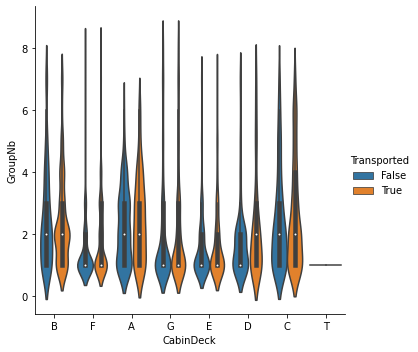

In [39]:
sns.catplot(data = data , x='CabinDeck', y='GroupNb',hue='Transported',kind='violin')

In [ ]:
num_cols

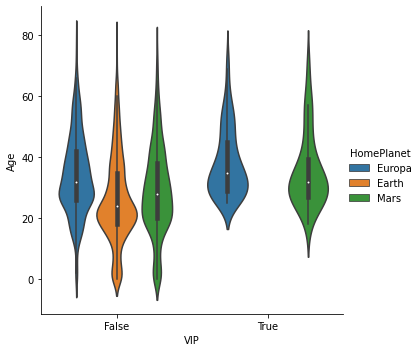

In [40]:
sns.catplot(data = data , x='VIP', y='Age',hue='HomePlanet',kind='violin')

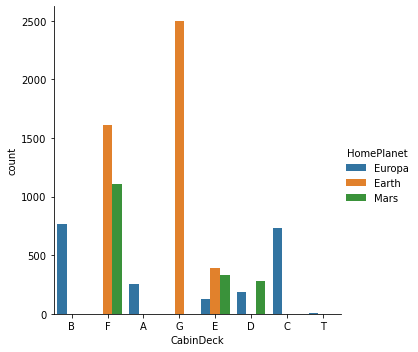

In [99]:
sns.catplot(data = data , x='CabinDeck',hue='HomePlanet',kind='count')

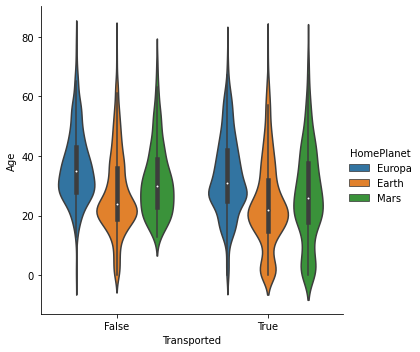

In [41]:
sns.catplot(data = data , x='Transported', y='Age',hue='HomePlanet',kind='violin')

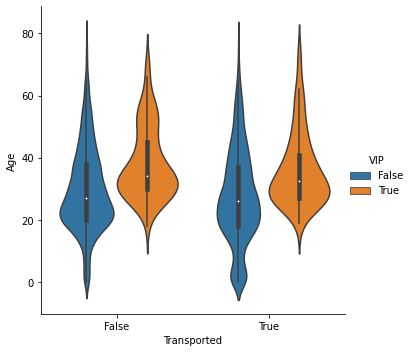

In [42]:
sns.catplot(data = data , x='Transported', y='Age',hue='VIP',kind='violin')

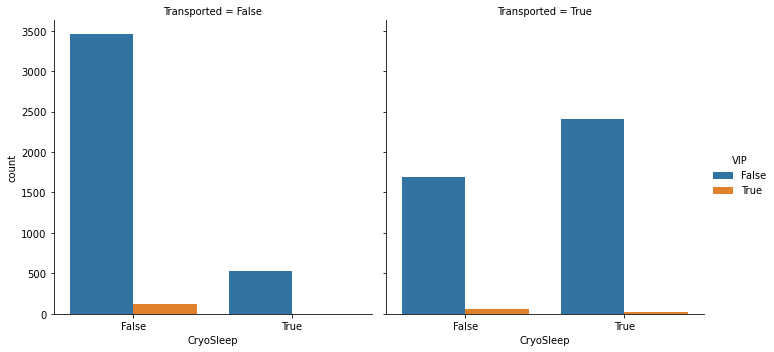

In [43]:
sns.catplot(data = data , x='CryoSleep',hue='VIP',col='Transported',kind='count')

In [44]:
data.groupby(['Transported']).count()#['CryoSleep'].count()

,PassengerId,GroupId,GroupSubId,Name,FirstName,FamilyName,FamilyId,Age,GroupNb,FamilyNb,...,ShoppingMall,Spa,VRDeck,MoneySpent,FamilyRoomService,FamilyFoodCourt,FamilyShoppingMall,FamilySpa,FamilyVRDeck,FamilyMoneySpent
Transported,,,,,,,,,,,,,,,,,,,,,
False,4315,4315,4315,4216,4216,4216,4315,4226,4315,4315,...,4221,4223,4225,4315,4315,4315,4315,4315,4315,4315
True,4378,4378,4378,4277,4277,4277,4378,4288,4378,4378,...,4264,4287,4280,4378,4378,4378,4378,4378,4378,4378


In [45]:
pd.DataFrame(data.groupby(['Transported','HomePlanet'])['PassengerId'].count())

PassengerId
Transported HomePlanet             
False       Earth              2651
            Europa              727
            Mars                839
True        Earth              1951
            Europa             1404
            Mars                920